<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.851 - Tipología y ciclo de vida de los datos aula 2 · Práctica 2</p>
<p style="margin: 0; text-align:right;">2021-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación

</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Práctica 2: Limpieza y análisis de datos

## Alumno: Manel Muñiz Perálvarez



Librerías utilizadas dentro de el proyecto:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

### Descripción del dataset

Dentro de nuestro dataset escogido podemos encontrar los siguientes atributos que definen cada tupla de información que podemos encontrar:

Invoice id:  Número de identificación de la factura del albarán de venta generado por ordenador

Branch: Sucursal del supercentro (existen 3 sucursales identificadas con A, B y C).

City: Ubicación de los supercentros

Customer type: Tipo de clientes, registrado por Socios para los clientes que usan tarjeta de socio y Normal para los que no tienen tarjeta de socio.

Gender: Tipo de género del cliente

Product line: Grupos de categorización de artículos generales - Accesorios electrónicos, Accesorios de moda, Alimentos y bebidas, Salud y belleza, Hogar y estilo de vida, Deportes y viajes

Unit price: Precio de cada producto en $.

Quantity: Número de productos comprados por el cliente

Tax: Tasa de impuesto del 5% para la compra del cliente

Total: Precio total con impuestos incluidos

Date: Fecha de compra (Registro disponible desde enero de 2019 hasta marzo de 2019)

Time: Hora de la compra (de 10 a 21 horas)

Payment: Pago utilizado por el cliente para la compra (hay 3 métodos disponibles: efectivo, tarjeta de crédito y Ewallet)

COGS: Coste de la mercancía vendida

Gross margin percentage: Porcentaje de margen bruto

Gross income: Margen bruto

Rating: Calificación de la estratificación de los clientes sobre su experiencia general de compra (En una escala de 1 a 10)

### Limpieza de datos

A la hora de trabajar con nuestro dataset, nos interesa tener unos datos lo más correctos posibles que nos faciliten las tareas. Primero vamos a cargar nuestros datos en una variable df gracias a la librería Pandas: 

In [2]:
# read data
df = pd.read_csv("supermarket_sales.csv")

Hacemos impresión de las primeras tuplas para verificar que los datos se han cargado correctamente:

In [3]:
#Hacemos un head para mostrar las primeras líneas
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

Y, a continuación, cargamos algunos valores generales de interés, cómo bien podría ser la verificación de si se encuentran valores "NA" dentro de nuestro dataset:

In [4]:
print(f"Número de línias: {len(df)}")
print(f"Número de columnas: {len(df.columns)}") 
print(f"Verificamos si hay valores null: {df.isnull().values.any()}") 

Número de línias: 1000
Número de columnas: 17
Verificamos si hay valores null: False


Realizamos un describe para ver algunas métricas generales de los distintos datos:

In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


Ahora, vamos a deshacernos de los atributos los cúales no sean útiles o interesantes para utilizar en nuestro posterior análisis.

Entre los atributos a eliminar encontramos:

- Invoice ID: Atributo que sirve para enumerar las tuplas y no es útil en nuestro análisis.
- Cogs: Valor obtenido de efectuar Producto * Quantity que no es de utilidad para nuestro análisis.
- Gross Margin Percentage: Valor igual para toda las tuplas que no nos provee información de valor: 0.04761905
- Gross Income: Cálculo de multiplicar Total * gross margin percentage (el cuál siempre es 0.04761905)

#### Eliminación de atributos no necesarios

In [6]:
df.drop("Invoice ID", axis=1, inplace=True)
df.drop("cogs", axis=1, inplace=True)
df.drop("gross margin percentage", axis=1, inplace=True)
df.drop("gross income", axis=1, inplace=True)

Efectuamos un head() para comprobar que las variables se han eliminado correctamente:

In [7]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


#### Renombrado de variables

Ahora, vamos a renombrar nuestras columnas para evitar futuros errores al ser utilizada en algunas librerías (cómo puede ser el caso de algunas librerías las cuáles no compilan si los nombres tienen espacios):

In [8]:
df.rename(columns={'Customer type': 'Customer_type', 'Product line': 'Product_line', 
                   'Unit price': 'Unit_price', 'Tax 5%': 'Tax_5%' }, inplace=True)

Y comprobamos que el cambio se haya efectuado correctamente:

In [9]:
df.head()

,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


Comprobamos que no tengamos ningún tipo de valor vacío o 'NA' dentro de nuestro dataset original:

In [10]:
df.isna().sum().sum()

0

#### Creación de nuevas columnas

A continuación, vamos a añadir a nuestro dataframe variables numéricas binarias basándonos en algunos datos que podemos encontrar contenidos dentro de el dataset. Estas variables nos serán de ayuda en un futuro para predecir modelos ya que, si utilizamos las variables planas, podemos encontrar como veremos más adelante que la precisión de nuestros modelos puede llegar a ser baja:

In [11]:
df

,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,4.1


In [12]:
# Mantenemos una copia del dataframe original por si lo necesitamos en un futuro
df_original = df.copy() 

# Generamos las nuevas variables
df['High_Quantity'] = df['Quantity'].apply(lambda x: 1 if x >= 5 else 0)
df['High_Payment'] = df['Total'].apply(lambda x: 1 if x >= 500 else 0)
df['Is_Member'] = df['Customer_type'].replace(['Member','Normal'],[1,0])
df['High_Rating'] = df['Rating'].apply(lambda x: 1 if x >= 5 else 0)


También añadiremos nuestras variables categóricas de forma numérica para poder utilizarlo de forma sencilla en un futuro (cómo en el caso de querer generar una regresión logística):

In [13]:
df['Payment_numeric'] = df['Payment'].replace(['Cash', 'Credit card','Ewallet'], [0, 1, 2], inplace=True)
df['City_numeric'] = df['City'].replace(['Yangon', 'Mandalay','Naypyitaw'], [0, 1, 2], inplace=True)
df['Gender_numeric'] = df['Gender'] .replace(['Female', 'Male'], [0, 1], inplace=True)
df['Branch_numeric'] = df['Branch'].replace(['A', 'B', 'C'], [0, 1, 2], inplace=True)

#### Cambio del tipo de los datos

A la hora de representar los datos, lo primero que haremos a la hora de representar nuestros datos es ver de que tipo son:

In [14]:
print(df.dtypes)

Branch               int64
City                 int64
Customer_type       object
Gender               int64
Product_line        object
Unit_price         float64
Quantity             int64
Tax_5%             float64
Total              float64
Date                object
Time                object
Payment              int64
Rating             float64
High_Quantity        int64
High_Payment         int64
Is_Member            int64
High_Rating          int64
Payment_numeric     object
City_numeric        object
Gender_numeric      object
Branch_numeric      object
dtype: object


Ahora, transformaremos a variables categóricas aquellas que nos interese tenerlas de esta manera para su posterior estudio:

In [15]:
df["Branch"] = df["Branch"].astype("category")
df["City"] = df["City"].astype("category")
df["Customer_type"] = df["Customer_type"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["Product_line"] = df["Product_line"].astype("category")
df["Payment"] = df["Payment"].astype("category")

In [16]:
print(df.dtypes)

Branch             category
City               category
Customer_type      category
Gender             category
Product_line       category
Unit_price          float64
Quantity              int64
Tax_5%              float64
Total               float64
Date                 object
Time                 object
Payment            category
Rating              float64
High_Quantity         int64
High_Payment          int64
Is_Member             int64
High_Rating           int64
Payment_numeric      object
City_numeric         object
Gender_numeric       object
Branch_numeric       object
dtype: object


### Representación y análisis de los datos

#### Diagramas de caja

Para empezar con la representación de nuestros datos, vamos a revisar que no tengamos ningún tipo de valor outlier en nuestro conjunto de datos:

{'whiskers': [<matplotlib.lines.Line2D at 0x18c855c67c0>,
 'caps': [<matplotlib.lines.Line2D at 0x18c855c6e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c855c64f0>],
 'medians': [<matplotlib.lines.Line2D at 0x18c855e4340>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c855e4610>],
 'means': []}

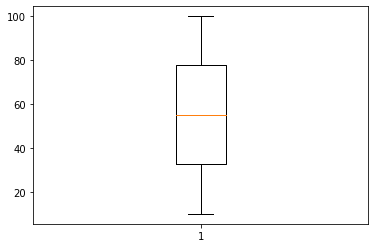

In [17]:
plt.boxplot(df["Unit_price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x18c856b2f40>,
 'caps': [<matplotlib.lines.Line2D at 0x18c856bf520>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c856b2c70>],
 'medians': [<matplotlib.lines.Line2D at 0x18c856bfac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c856bfd90>],
 'means': []}

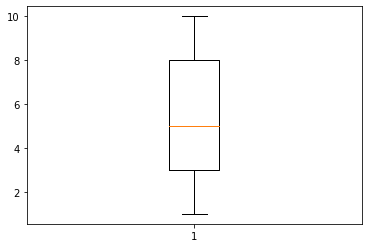

In [18]:
plt.boxplot(df["Quantity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x18c85726340>,
 'caps': [<matplotlib.lines.Line2D at 0x18c857268e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c85726070>],
 'medians': [<matplotlib.lines.Line2D at 0x18c85726e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c85736190>],
 'means': []}

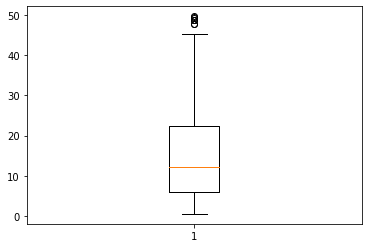

In [19]:
plt.boxplot(df["Tax_5%"])

{'whiskers': [<matplotlib.lines.Line2D at 0x18c857879d0>,
 'caps': [<matplotlib.lines.Line2D at 0x18c85787f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c85787700>],
 'medians': [<matplotlib.lines.Line2D at 0x18c85797550>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c85797820>],
 'means': []}

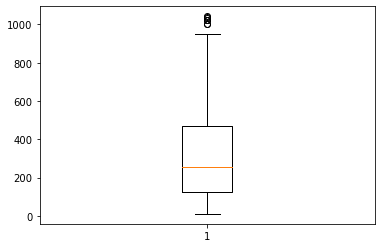

In [20]:
plt.boxplot(df["Total"])

{'whiskers': [<matplotlib.lines.Line2D at 0x18c857f9190>,
 'caps': [<matplotlib.lines.Line2D at 0x18c857f9730>,
 'boxes': [<matplotlib.lines.Line2D at 0x18c857e9e80>],
 'medians': [<matplotlib.lines.Line2D at 0x18c857f9cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18c857f9fa0>],
 'means': []}

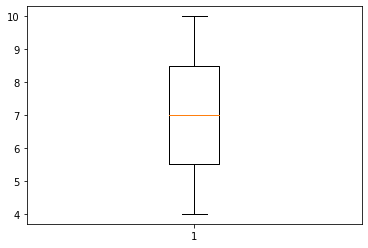

In [21]:
plt.boxplot(df["Rating"])

Nuestros únicos valores que se salen de nuestro conjunto general de datos los encontramos en "Total" y "Tax 5%"" (los cuáles están relacionados) y no vamos a considerarlos outliers ya que representan compras grandes (las cuáles, tiene sentido disponer de ellas dentro de nuestro dataset)

In [22]:
#### Visualización de los datos

Nuestro siguiente paso será hacer una separación clara de las variables categóricas y las variables numéricas. 

Para las variables categóricas calcularemos la frecuencia y generaremos un gráfico de barras y para las numéricas haremos calculos estadísticos descriptivos básicos cómo bien podrían ser la media, mediana, desviación estándard, etc... y generaremos un histograma para recoger información.

Calculamos la frecuencia:
AxesSubplot(0.125,0.125;0.775x0.755)


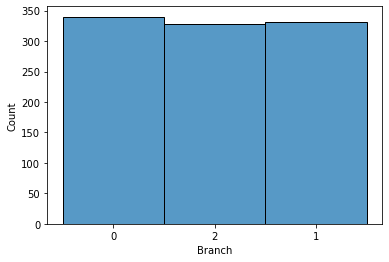

In [23]:
print("Calculamos la frecuencia:")
df["Branch"].value_counts()
print(sns.histplot(x=df["Branch"].astype(str)))

- City

Calculamos la frecuencia:
AxesSubplot(0.125,0.125;0.775x0.755)


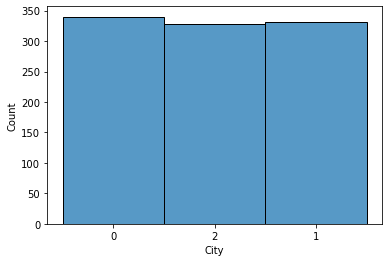

In [24]:
print("Calculamos la frecuencia:")
df["City"].value_counts()
print(sns.histplot(x=df["City"].astype(str)))

- Customer Type

Calculamos la frecuencia:
AxesSubplot(0.125,0.125;0.775x0.755)


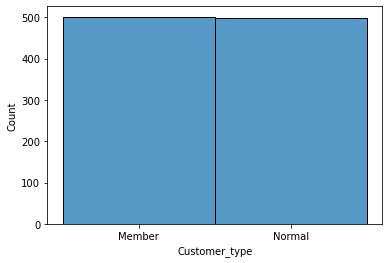

In [25]:
print("Calculamos la frecuencia:")
df["Customer_type"].value_counts()
print(sns.histplot(x=df["Customer_type"].astype(str)))

- Gender

Calculamos la frecuencia:
AxesSubplot(0.125,0.125;0.775x0.755)


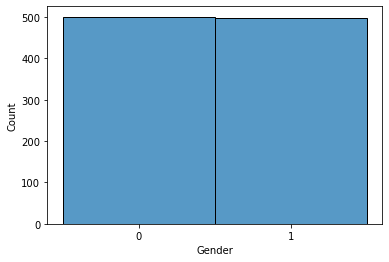

In [26]:
print("Calculamos la frecuencia:")
df["Gender"].value_counts()
print(sns.histplot(x=df["Gender"].astype(str)))

- Product Line

Calculamos la frecuencia:


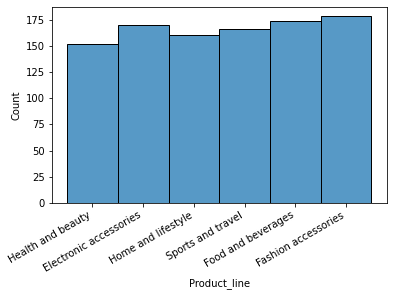

In [27]:
print("Calculamos la frecuencia:")
df["Product_line"].value_counts()
sns_plot = sns.histplot(x=df["Product_line"].astype(str))
sns_plot.get_figure().autofmt_xdate()

- Payment

Calculamos la frecuencia:


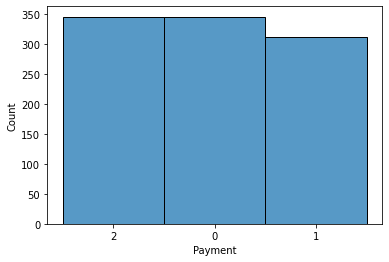

In [28]:
print("Calculamos la frecuencia:")
df["Payment"].value_counts()
sns_plot = sns.histplot(x=df["Payment"].astype(str))

Variables numéricas:

Primero vamos a hacer el cálculo general de todos los datos descriptivos básicos que queremos obtener para las variables numéricas:

In [29]:
print("Media:")
print(df_original.mean())
print("Medianas:")
print(df_original.median())
print("Desviación estándar:")
print(df_original.std())
print("")
print("Finalmente mostramos un describe para comprobar las variables y mostrar algunas otras:")
df_original.describe()

Media:
Unit_price     55.672130
Quantity        5.510000
Tax_5%         15.379369
Total         322.966749
Rating          6.972700
dtype: float64
Medianas:
Unit_price     55.230
Quantity        5.000
Tax_5%         12.088
Total         253.848
Rating          7.000
dtype: float64
Desviación estándar:
Unit_price     26.494628
Quantity        2.923431
Tax_5%         11.708825
Total         245.885335
Rating          1.718580
dtype: float64

Finalmente mostramos un describe para comprobar las variables y mostrar algunas otras:


C:\Users\manel\AppData\Local\Temp\ipykernel_10880\2730022548.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_original.mean())
C:\Users\manel\AppData\Local\Temp\ipykernel_10880\2730022548.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_original.median())
C:\Users\manel\AppData\Local\Temp\ipykernel_10880\2730022548.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_original.std())


,Unit_price,Quantity,Tax_5%,Total,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,6.97270
std,26.494628,2.923431,11.708825,245.885335,1.71858
min,10.080000,1.000000,0.508500,10.678500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,5.50000
50%,55.230000,5.000000,12.088000,253.848000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,10.00000


- Unit Price

<AxesSubplot:xlabel='Unit_price', ylabel='Count'>

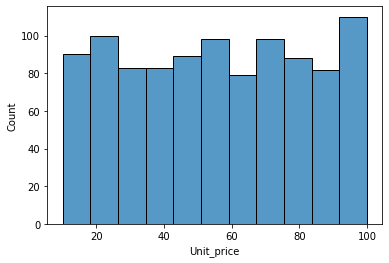

In [30]:
sns.histplot(x=df['Unit_price'])

- Quantity

<AxesSubplot:xlabel='Quantity', ylabel='Count'>

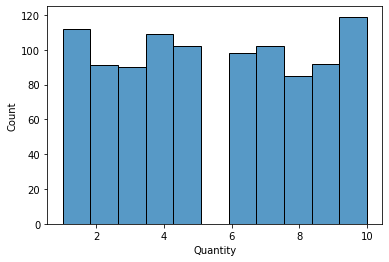

In [31]:
sns.histplot(x=df['Quantity'])

- Tax

<AxesSubplot:xlabel='Tax_5%', ylabel='Count'>

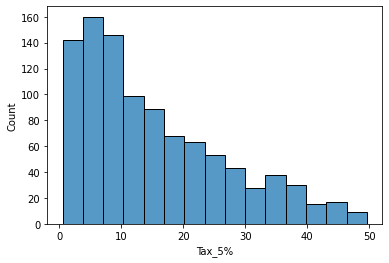

In [32]:
sns.histplot(x=df['Tax_5%'])

- Total

<AxesSubplot:xlabel='Total', ylabel='Count'>

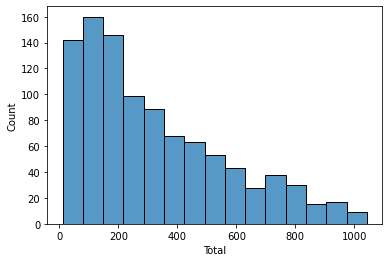

In [33]:
sns.histplot(x=df['Total'])

- Rating

<AxesSubplot:xlabel='Rating', ylabel='Count'>

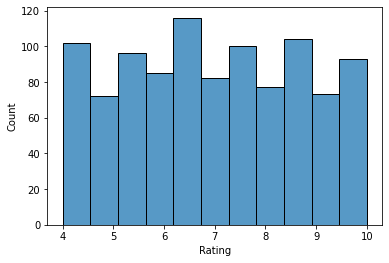

In [34]:
sns.histplot(x=df['Rating'])

Una vez hemos efectuado los cálculos y hemos obtenido diversas informaciones de utilidad sobre nuestro dataset, vamos ahora a generar una información que puede ser de interés tener en cuenta a la hora del estudio: vamos a ver unos datos generales de ventas para cada una de las branches de la que se han recogido datos.

In [35]:
df[['Branch', 'Total']]\
.groupby('Branch').agg(['mean','sum','count'])

Total                   
              mean          sum count
Branch                               
0       312.354031  106200.3705   340
1       319.872506  106197.6720   332
2       337.099715  110568.7065   328

De esta manera, podemos ver información que es realmente interesante: la media de ventas para el branch "C" es mayor a diferencia del branch "A" y "B" y, aún teniendo menos ventas generales, "C" es la que más cantidad de ventas genera.

#### Matriz de correlaciones

A continuación, vamos a generar la matriz de correlación y las correlaciones de manera gráfica (solo para los datos originales) de nuestros datos para ver cómo se relacionan entre ellos.La matriz de correlación muestra los valores de correlación de Pearson, que miden el grado de relación lineal entre cada par de elementos o variables. Nos interesa generar esta matriz para verificar si el valor "Rating" se puede ver influenciado por alguno de los otros valores numéricos del dataset. Los valores de correlación se pueden ubicar entre -1 y +1: 

In [36]:
df.corr()

,Unit_price,Quantity,Tax_5%,Total,Rating,High_Quantity,High_Payment,Is_Member,High_Rating
Unit_price,1.000000,0.010778,0.633962,0.633962,-0.008778,-0.008295,0.515785,0.020238,-0.037710
Quantity,0.010778,1.000000,0.705510,0.705510,-0.015815,0.848095,0.531238,0.016763,-0.001873
Tax_5%,0.633962,0.705510,1.000000,1.000000,-0.036442,0.589769,0.837716,0.019670,-0.050890
Total,0.633962,0.705510,1.000000,1.000000,-0.036442,0.589769,0.837716,0.019670,-0.050890
Rating,-0.008778,-0.015815,-0.036442,-0.036442,1.000000,-0.002226,-0.035443,-0.018889,0.627829
High_Quantity,-0.008295,0.848095,0.589769,0.589769,-0.002226,1.000000,0.444310,-0.014677,-0.002867
High_Payment,0.515785,0.531238,0.837716,0.837716,-0.035443,0.444310,1.000000,0.025176,-0.074730
Is_Member,0.020238,0.016763,0.019670,0.019670,-0.018889,-0.014677,0.025176,1.000000,-0.046374
High_Rating,-0.037710,-0.001873,-0.050890,-0.050890,0.627829,-0.002867,-0.074730,-0.046374,1.000000


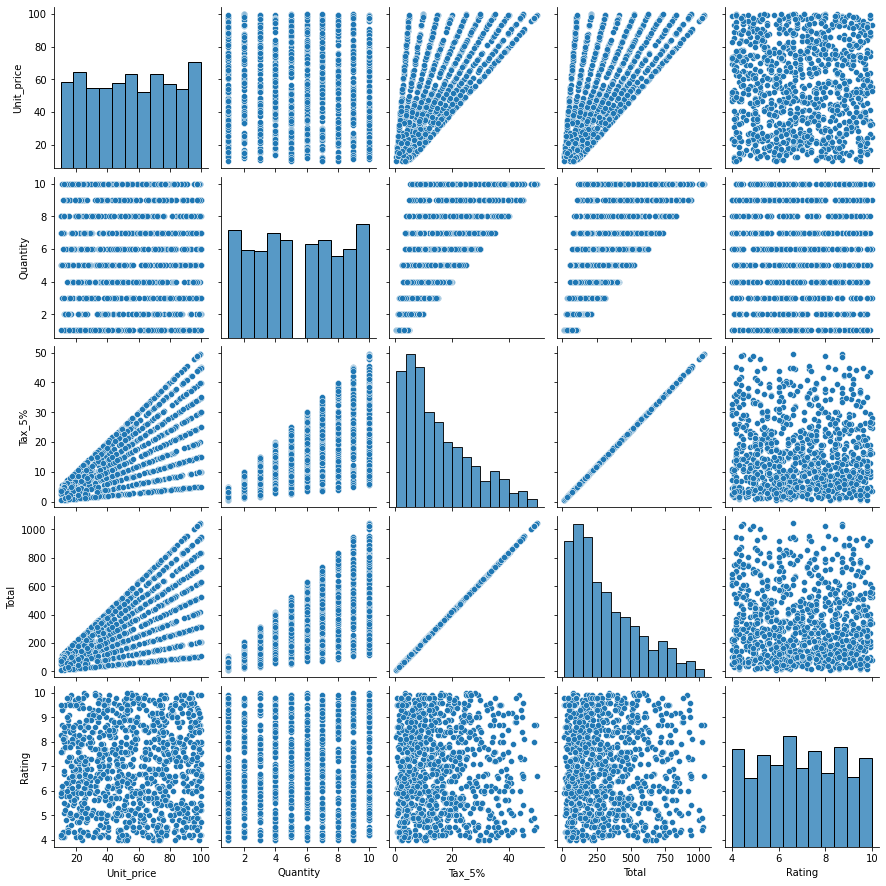

In [37]:
sns.pairplot(df_original)
plt.show()

Tal y cómo podemos observar, "Rating" no pare tener una correlación lineal directa entre el resto de variables numéricas de nuestro conjunto.

#### Modelo de regresión logística

Dentro de nuestro estudio nos es de sumo interés poder realizar predicciones de variables respecto a otras que encontremos en nuestro conjunto de datos.

En nuestro caso, vamos a aplicar una regresión logística en base a nuestros datos categóricos para ver si podemos generar un modelo el cuál nos permita predecir el "Rating" de un producto basándose en otras varables que definen el dataset.

Para obtener el modelo óptimo, vamos a realizar distintas predicciones utilizando diferentes variables hasta que encontremos el modelo de regresión logística más acertado. Para determinar este parámetro, seleccionaremos el modelo que presente un mayor coeficiente de determinación R2. El coeficiente de determinación es la proporción de la varianza total de la variable explicada por la regresión y refleja la bondad del ajuste de un modelo a la variable que pretender explicar ayudándonos a determinar el mejor modelo a elegir.

In [38]:
df.head()

,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,Rating,High_Quantity,High_Payment,Is_Member,High_Rating,Payment_numeric,City_numeric,Gender_numeric,Branch_numeric
0,0,0,Member,0,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,2,9.1,1,1,1,1,None,None,None,None
1,2,2,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,0,9.6,1,0,0,1,None,None,None,None
2,0,0,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,1,7.4,1,0,0,1,None,None,None,None
3,0,0,Member,1,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,2,8.4,1,0,1,1,None,None,None,None
4,0,0,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,2,5.3,1,1,0,1,None,None,None,None


###### Variables originales ['Branch', 'Gender','City', 'Unit_price', 'Quantity', 'Total','Payment]:

In [39]:
X = df[['Branch', 'Gender','City', 'Unit_price', 'Quantity', 'Total','Payment']]

y = df['High_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Creamos el modelo de regresión logística y generamos la predicción:

In [40]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

Gracias a la creación de la matriz de confusión, obtendremos los valores que nos dictaminan como de bueno ha sido nuestro modelo de regresión:

Text(0.5, 257.44, 'Predicted label')

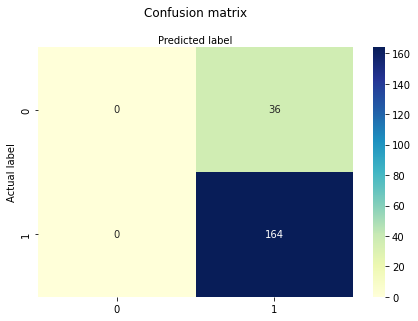

In [41]:
cnf_matrix = metrics.confusion_matrix(y_test, prediction)

# Generamos un heatmap para la matriz de confusión para así visualizar los datos de forma más clara
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision Score : ",metrics.precision_score(y_test, prediction, average='micro'))
print("Recall Score : ",metrics.recall_score(y_test, prediction, average='micro'))

Accuracy: 0.82
Precision Score :  0.82
Recall Score :  0.82


Podemos observar que tenemos una accuracy bastante buena de un 82% pero aún así, vamos a probar con nuestras nuevas variables generadas para ver si podemos obtener un modelo de regresión más idóneo para nuestro modelo:

##### Regresión con otras variables. Variables ['Branch', 'Gender', 'Unit_price', 'Total', 'High_Quantity', 'High_Payment', 'Is_Member']:

Text(0.5, 257.44, 'Predicted label')

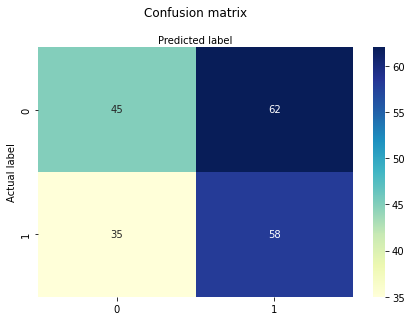

In [43]:
# Generamos las nuevas variables
X = df[['Branch', 'Gender', 'Unit_price', 'Total', 'High_Quantity', 'High_Payment', 'Rating']]
y = df['Is_Member']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, prediction)

# Generamos un heatmap para la matriz de confusión para así visualizar los datos de forma más clara
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision Score : ",metrics.precision_score(y_test, prediction, average='micro'))
print("Recall Score : ",metrics.recall_score(y_test, prediction, average='micro'))

Accuracy: 0.515
Precision Score :  0.515
Recall Score :  0.515


Tal y cómo podemos ver, después de realizar diferentes pruebas (algunas las cuáles no han sido añadidas a este reporte) hemos podido comprobar que por más combinaciones de variables que probamos, no conseguimos una precisión que sea mayor a un 55%. Podríamos decir que el modelo de regresión logística se comporta de manera adecuada para nuestros datos en el primer caso dónde obtenemos un 80% de accuracy (no es perfecto pero sí el más correcto dentro de las posibilidades analizadas) pero no para el resto.

### Decision Tree Classifier

Aprendizaje basado en árboles de decisión como un modelo predictivo que mapea observaciones sobre un artículo a conclusiones sobre el valor objetivo del artículo. Es uno de los enfoques de modelado predictivo utilizadas en estadísticas, minería de datos y aprendizaje automático.

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

Classification Report is:
               precision    recall  f1-score   support

           0       0.47      0.63      0.54        94
           1       0.53      0.37      0.43       106

    accuracy                           0.49       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.50      0.49      0.48       200



Text(0.5, 257.44, 'Predicted label')

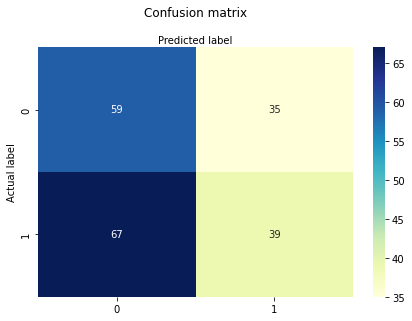

In [46]:
y_pred=dtree.predict(X_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Generamos un heatmap para la matriz de confusión para así visualizar los datos de forma más clara
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
print("Training Score:", dtree.score(X_train,y_train)*100)

Training Score: 56.49999999999999


### AdaBoostClassifier

Ada-boost es uno de los clasificadores boosting ensemble propuestos por Yoav Freund y Robert Schapire en 1996. Combina múltiples clasificadores para aumentar la precisión de los mismos. AdaBoost es un método de conjunto iterativo. El clasificador AdaBoost construye un clasificador fuerte mediante la combinación de múltiples clasificadores de bajo rendimiento, de modo que se obtiene un clasificador fuerte de alta precisión. El concepto básico detrás de Adaboost es establecer los pesos de los clasificadores y el entrenamiento de la muestra de datos en cada iteración de tal manera que asegura las predicciones precisas de las observaciones inusuales.

In [48]:
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(X_train,y_train)

AdaBoostClassifier()

In [49]:
y_pred=adb.predict(X_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.50      0.53      0.52        94
           1       0.56      0.53      0.54       106

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200

Confusion Matrix:
 [[50 44]
 [50 56]]


In [50]:
print("Training Score:\n",adb.score(X_train,y_train)*100)

Training Score:
 62.5


In [51]:
### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.44      0.50      0.47        94
           1       0.49      0.43      0.46       106

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.46       200
weighted avg       0.47      0.47      0.46       200

Confusion Matrix:
 [[47 47]
 [60 46]]


In [53]:
print("Training Score:\n",rfc.score(X_train,y_train)*100)

Training Score:
 100.0


Tal y cómo podemos observar, para los 2 últimos modelos de predicción obtenidos (Decision Tree Classifier, AdaBoostClassifier) estamos encontrando un "Training Score" de alrededor de un 50% el cuál no es óptimo para hacer nuestras predicciones y, en el caso de la predicción sobre RandomForestClassifier, podemos ver que estamos obteniendo una precisión perfecta sobre nuestro conjunto entrenado.

También podemos observar gracias a nuestro "Classification Report" que los valores para precisión (la capacidad del clasificador de no etiquetar como positiva una muestra que es negativa) y recall (la capacidad del clasificador para encontrar todas las muestras positivas) no es buena, lo cuál nos dice que nuestro modelo no funciona de forma óptima.

Finalmente y cómo último paso, vamos a generar nuestro fichero csv con todos los cambios aplicados después de ejecutar la limpieza y preprocesamiento de nuestros datos:

In [54]:
df.to_csv(r'Final_Supermarket.csv', index = False)